# PS2 Numerical Integration
### Yongfei Lu  (Jan. 14th, 2020)

## Exercise 2.1

In [159]:
def calculate_integral(fn, a, b, N, method):
    if method == "midpoint":
        pts = [a + (b - a) / N * (i + 1/2) for i in range(N)]
        res = np.sum(fn(i) for i in pts) * (b - a) / N
    elif method == "trapezoid":
        pts = [a + (b - a) * i / N for i in range(N+1)]
        res = (sum(fn(i) for i in pts) + sum(fn(i) for i in pts[1:-1])) * (b - a) / (2 * N)
    elif method == "simpsons":
        pts = [a + (b - a) * i / (2 * N) for i in range(2 * N + 1)]
        res = ((b - a) / (6 * N)) *(fn(pts[0]) + fn(pts[-1]) + 4 * sum(fn(i) for i in pts[1:-1:2]) + 2 * sum(fn(i) for i in pts[2:-1:2]))
    return res


In [172]:
import sympy as sy
import numpy as np
from matplotlib import pyplot as plt


x = sy.symbols('x')
f = 0.1 * x ** 4 - 1.5 * x ** 3 + 0.53 * x ** 2 + 2 * x + 1
F = sy.integrate(f)
a, b= -10, 10

f = sy.lambdify(x, f)
F = sy.lambdify(x, F)
true = F(b) - F(a)

abs_error = {}
for m in ['midpoint', 'trapezoid', 'simpsons']:
    for N in range(20, 201):
        abs_error[m] = abs_error.get(m, [])
        abs_error[m].append(abs(calculate_integral(f, a, b, N, m) - true))



errors = np.array(list(abs_error.values()))


/Users/luyongfei/Desktop/python/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  after removing the cwd from sys.path.


Text(0, 0.5, 'Absolute errors')

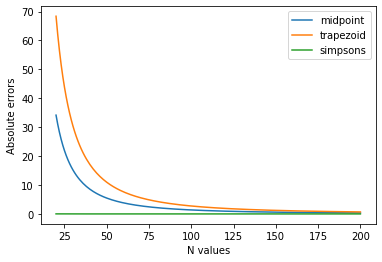

In [181]:
N = np.arange(20, 201, 1)
for m, errs in abs_error.items():
    plt.plot(N, np.array(errs), label = m)
plt.legend()
plt.xlabel("N values")
plt.ylabel("Absolute errors")

## Exercise 2.2

In [84]:
import scipy as sp
import numpy as np
from scipy.stats import lognorm
from scipy.stats import norm
import pandas as pd


def calculate_integral_norm(mu, sigma, N, k):
    Z = np.linspace(mu - k * sigma, mu + k * sigma, N)
    weight = np.ones(N)
    weight[0] = norm.cdf((Z[0] + Z[1]) / 2, mu, sigma)
    weight[-1] = 1 - norm.cdf((Z[-2] + Z[-1]) / 2, mu, sigma)
    for i in range(1, N-1):
        ub = norm.cdf((Z[i+1] + Z[i]) / 2, mu, sigma)
        lb = norm.cdf((Z[i-1] + Z[i]) / 2, mu, sigma)
        weight[i] = ub - lb
    return weight, Z

,Z,weight
0,0.5,0.003467
1,1.4,0.014397
2,2.3,0.048943
3,3.2,0.117253
4,4.1,0.198028
5,5.0,0.235823
6,5.9,0.198028
7,6.8,0.117253
8,7.7,0.048943
9,8.6,0.014397


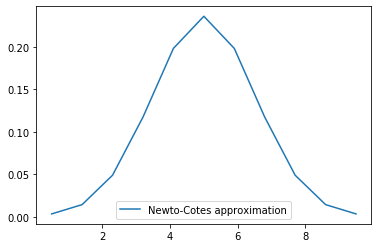

In [85]:
weight, Z = calculate_integral_norm(5, 1.5, 11, 3)
df = pd.DataFrame({'Z':Z, 'weight': weight})
plt.plot(Z, weight, label = "Newto-Cotes approximation")
plt.legend()
df

## Exercise 2.3

In [182]:
def calculate_integral_lognorm(mu, sigma, N, k):
    weight, Z = calculate_integral_norm(mu, sigma, N, k)
    A = np.exp(Z)
    return weight, A
    

,A,weight
0,1.648721,0.003467
1,4.055200,0.014397
2,9.974182,0.048943
3,24.532530,0.117253
4,60.340288,0.198028
5,148.413159,0.235823
6,365.037468,0.198028
7,897.847292,0.117253
8,2208.347992,0.048943
9,5431.659591,0.014397


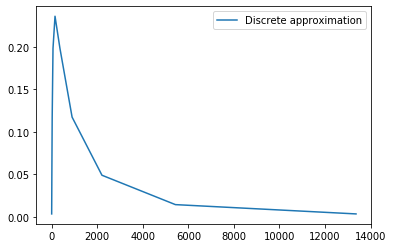

In [183]:
weight, A = calculate_integral_lognorm(5, 1.5, 11, 3)

df = pd.DataFrame({'A': A, 'weight': weight})
plt.plot(A, weight, label = "Discrete approximation")
plt.legend()
df

## Exercise 2.4

In [88]:
mu, sigma, N, k = 10.5, 0.8, 11, 3
actual = np.exp(mu + sigma ** 2 / 2)
weight, A = calculate_integral_lognorm(mu, sigma, N, k)
apprx = sum(weight * A)
print("exact expected value: {:0.4f}".format(actual))
print("approximate expected value: {:0.4f}".format(apprx))
print("difference: {:.4f}".format(apprx - actual))

exact expected value: 50011.0870
approximate expected value: 50352.4562
difference: 341.3692


## Exercise 3.1

In [89]:
f = lambda x: 0.1 * x ** 4 - 1.5 * x ** 3 + 0.53 * x ** 2 + 2 * x + 1
a, b, N = -10, 10, 3
# according to https://pomax.github.io/bezierinfo/legendre-gauss.html, for N = 3
ws = [8/9, 5/9, 5/9]
xs = [0, -0.7745966692414834, 0.7745966692414834]
c, d = (b - a) / 2, (b + a) / 2
gau_apprx = 0
for i in range(N):
    gau_apprx += ws[i] * f(c * xs[i] + d)
gau_apprx *= c
true = 4373 + 1/3
print('True integral value:{}'.format(true))
print('Gaussian approximate: {}'.format(gau_apprx))
print('Gaussian absolute error:{}'.format(abs(gau_apprx - true)))
print('Newto-Cotes absolute error:{}'.format(errors))

True integral value:4373.333333333333
Gaussian approximate: 4373.333333333334
Gaussian absolute error:9.094947017729282e-13
Newto-Cotes absolute error:[0.00013686670172319282, 0.00027373334978619823, 1.8189894035458565e-11]


In this case, we see that the Gaussian formula outperforms the alternative Newton-Cotes formula in terms of accuracy.

## Exercise 3.2

In [97]:
quad_apprx = quad(f, a, b)[0]
print("Numerically approximate integral value using scipy.integrate.quad: {}".format(quad_apprx))
print("Compared to the known analytical value, the absolute error of this method is {}".format(abs(quad_apprx - true)))


Numerically approximate integral value using scipy.integrate.quad: 4373.333333333334
Compared to the known analytical value, the absolute error of this method is 9.094947017729282e-13


## Exercise 4.1

In [126]:
import scipy.stats as sts

def integrate_MonteCarlo(fn, domain, N):
    # "scipy.stats just uses numpy.random to generate
    # its random numbers, so numpy.random.seed() will
    # work here as well." 
    # cite from [https://stackoverflow.com/questions/
    # 16016959/scipy-stats-seed]
    np.random.seed(seed = 25)
    x_scl = domain[0][1] - domain[0][0]
    y_scl = domain[1][1] - domain[1][0]
    x_lb, y_lb = domain[0][0], domain[1][0]
    x_draws = sts.uniform.rvs(x_lb, x_scl, size = N)
    y_draws = sts.uniform.rvs(y_lb, y_scl, size = N)
    
    fn_sum = 0
    for i in range(N):
        if fn(x_draws[i], y_draws[i]) <= 1:
            fn_sum += 1
        
    return fn_sum * 4 * (1 / N)

In [132]:
min_N = 1
dm= [[-1,1], [-1,1]]
g = lambda x, y: x ** 2 + y ** 2
while round(integrate_MonteCarlo(g, dm, min_N), 4) != 3.1415:
    min_N += 1

print("The smallest N meeting the requirement is", min_N)
    

The smallest N meeting the requirement is 1668


## Exercise 4.2

In [146]:
import math
def isPrime(n):
    for i in range(2, int(np.sqrt(n) + 1)):
        if n % i == 0:
            return False
    return True

def primes_ascend(N, min_val=2):
    primes_vec = np.zeros(N, dtype=int)
    MinIsEven = 1 - min_val % 2
    MinIsGrtrThn2 = min_val > 2
    curr_prime_ind = 0
    if not MinIsGrtrThn2:
        i = 2
        curr_prime_ind += 1
        primes_vec[0] = i
    i = min(3, min_val + (MinIsEven * 1))
    while curr_prime_ind < N:
        if isPrime(i):
            curr_prime_ind += 1
            primes_vec[curr_prime_ind - 1] = i
        i += 2
    return primes_vec

def gen_equidis_sq(n, d, sq_type):
    primes = primes_ascend(d)
    if sq_type == "weyl":
        return [math.modf(i)[0] for i in np.sqrt(primes)*n]
    elif sq_type == "haber":
        return [math.modf(i)[0] for i in np.sqrt(primes) * n * (n+1) / 2]
    elif sq_type == "niederreiter":
        p1 = np.array([2 ** ((i + 1) / (n + 1)) for i in range(d)])
        return [math.modf(i)[0] for i in n * p1]
    elif sq_type == "baker":
        p2 = [1 / (i + 1) for i in range(d)]
        return [math.modf(i)[0] for i in n * np.exp(p2)]
    else:
        return None
    

In [148]:
print("weyl:", gen_equidis_sq(10, 3, "weyl"))

weyl: [0.142135623730951, 0.32050807568877104, 0.36067977499789805]


In [149]:
print("haber:", gen_equidis_sq(10, 3, "haber"))

haber: [0.7817459305202306, 0.2627944162882443, 0.9837387624884428]


In [150]:
print("niederreiter:", gen_equidis_sq(10, 3, "niederreiter"))

niederreiter: [0.6504108943996272, 0.3431252219546259, 0.08089444404447121]


In [151]:
print("baker:", gen_equidis_sq(10, 3, "baker"))

baker: [0.18281828459045002, 0.4872127070012837, 0.9561242508608956]


## Exercise 4.3

In [152]:
g = lambda x, y: x ** 2 + y ** 2 <= 1
def integrate_qsMonteCarlo(fn, domain, N, sq_type):
    np.random.seed(25)
    x_lb, x_ub = domain[0][0], domain[0][1]
    x_dff = x_ub - x_lb
    y_lb, y_ub = domain[1][0], domain[1][1]
    y_dff = y_ub - y_lb
    if sq_type == "weyl":
        xs = [x_dff * gen_equidis_sq(i, 2, "weyl")[0] + x_lb for i in range(N)]
        ys = [y_dff * gen_equidis_sq(i, 2, "weyl")[1] + y_lb for i in range(N)]
    elif sq_type == "haber":
        xs = [x_dff * gen_equidis_sq(i, 2, "haber")[0] + x_lb for i in range(N)]
        ys = [y_dff * gen_equidis_sq(i, 2, "haber")[1] + y_lb for i in range(N)]
    elif sq_type == "niederreiter":
        xs = [x_dff * gen_equidis_sq(i, 2, "niederreiter")[0] + x_lb for i in range(N)]
        ys = [y_dff * gen_equidis_sq(i, 2, "niederreiter")[1] + y_lb for i in range(N)]
    elif sq_type == "baker":
        xs = [x_dff * gen_equidis_sq(i, 2, "baker")[0] + x_lb for i in range(N)]
        ys = [y_dff * gen_equidis_sq(i, 2, "baker")[1] + y_lb for i in range(N)]
    return (x_dff * y_dff) * np.sum(fn(np.array(xs),np.array(ys))) / N




In [153]:
min_N, pi = 1, 3.1415
dm = [[-1, 1], [-1, 1]]

while round(integrate_qsMonteCarlo(g, dm, min_N, "weyl"), 4) != pi:
    min_N += 1
print("The smallest N for weyl method is", min_N)

The smallest N for weyl method is 1230


In [154]:
min_N = 1
while round(integrate_qsMonteCarlo(g, dm, min_N, "haber"), 4) != pi:
    min_N += 1
print("The smallest N for haber method is", min_N)

The smallest N for haber method is 2064


In [ ]:
min_N = 1
while round(integrate_qsMonteCarlo(g, dm, min_N, "niederreiter"), 4) != pi:
    min_N += 1
    if min_N > 5000:
        print("Niederreiter's smallest N is too large to count")

In [156]:
min_N = 1
while round(integrate_qsMonteCarlo(g, dm, min_N, "baker"), 4) != pi:
    min_N += 1
print("The smallest N for baker method is", min_N)

The smallest N for baker method is 205


Clearly, in terms of convergence rate, baker method ranks first, followed respectively by weyl, haber. Niederreiter method is the worst, since we cannot even calculate the smallest N within reasonable time using the algorithom of the same complexity as the other methods.